## FLIGHT PRICE PREDICTION 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
flight = pd.read_csv('Clean_Dataset.csv')
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
flight.duplicated().sum()

np.int64(0)

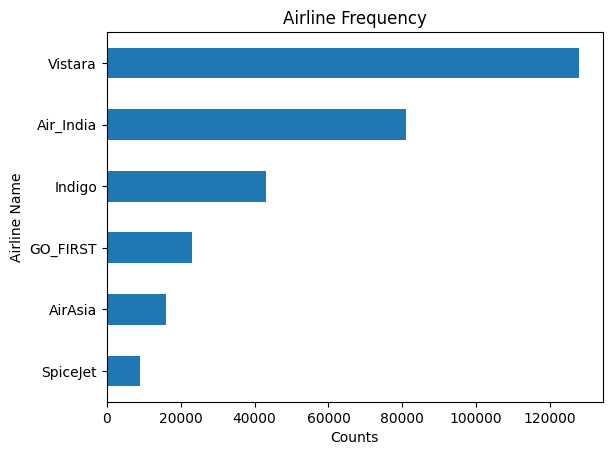

In [9]:
flight['airline'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Airline Frequency')
plt.xlabel('Counts')
plt.ylabel('Airline Name')
plt.show()

In [10]:
# flight.groupby('source_city')['price'].plot(kind='bar')

In [11]:
flight['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='airline'>

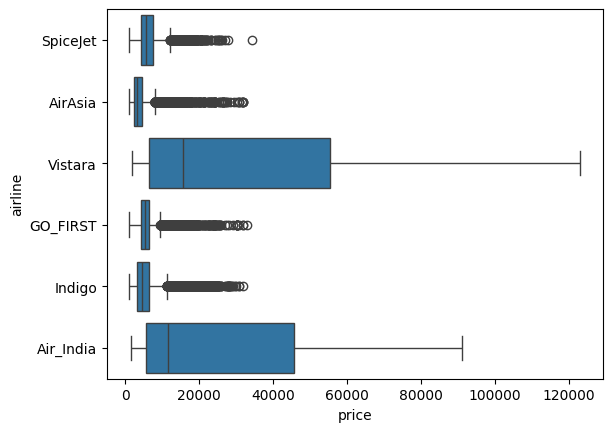

In [12]:
sns.boxplot(y='airline', x='price', data=flight)

In [13]:
flight['price'].value_counts()


price
54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
10767       1
10946       1
12206       1
12972       1
5607        1
Name: count, Length: 12157, dtype: int64

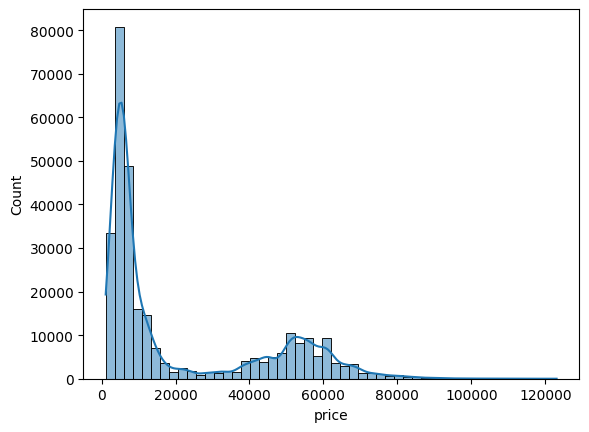

In [14]:
sns.histplot(x= ('price'), data=flight, bins=50, kde=True)
plt.show()

In [15]:
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


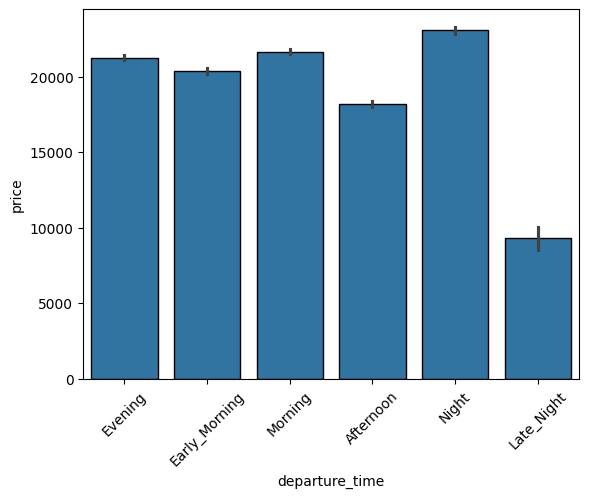

In [16]:
sns.barplot(x='departure_time', y= 'price', data=flight, estimator='mean',edgecolor='black')
plt.xticks(rotation=45)
plt.show()

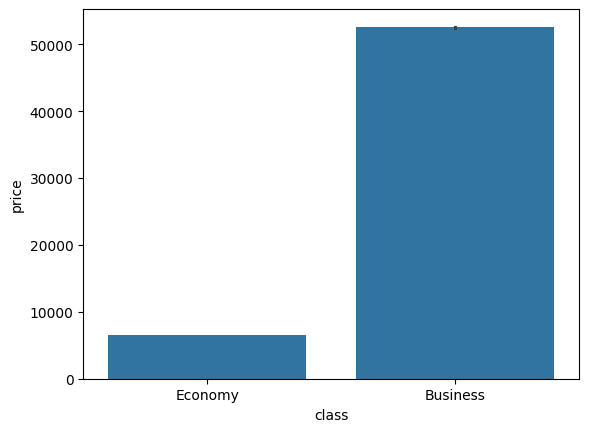

In [17]:
sns.barplot(x='class', y = 'price', data=flight)
plt.show()

In [18]:
flight['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [19]:
flight.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


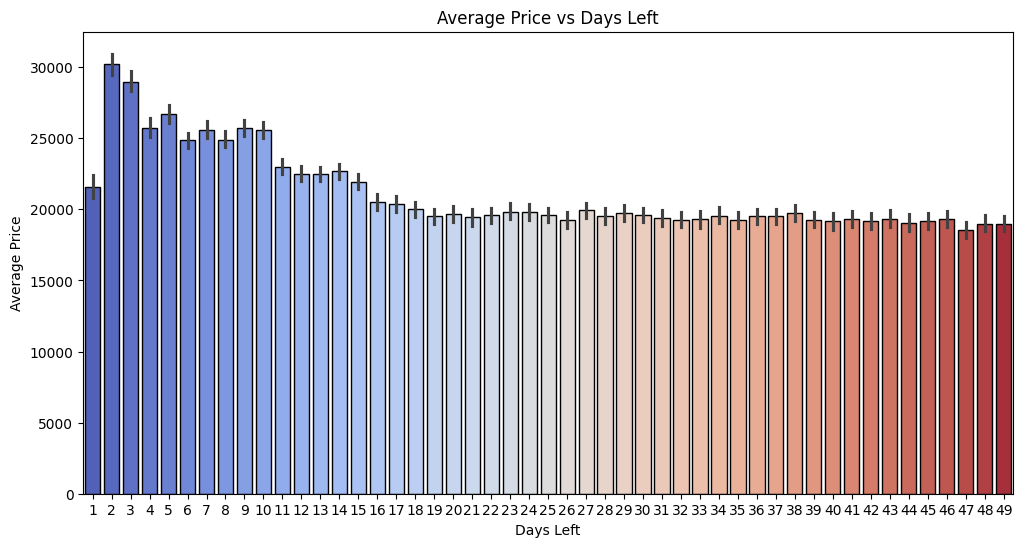

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=flight,
    x='days_left',
    y='price',
    estimator='mean',
    edgecolor='black',
    palette='coolwarm'
)
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.title("Average Price vs Days Left")
plt.show()


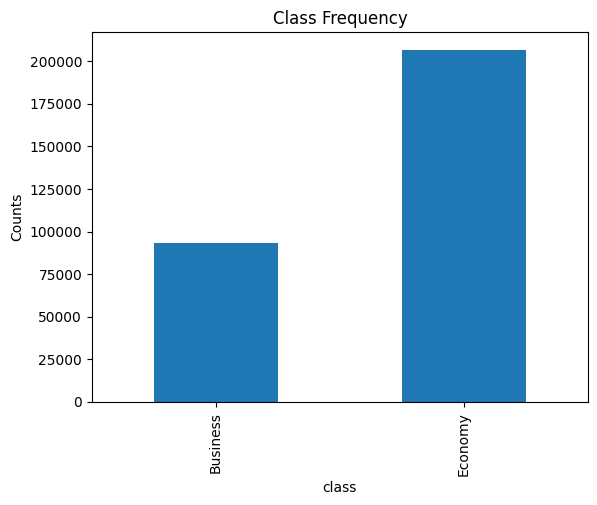

In [21]:
flight['class'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.title('Class Frequency')
plt.ylabel('Counts')
plt.show()

In [22]:
flight.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [23]:
flight['flight'].value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

In [24]:
flight.drop(columns=['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [25]:
flight.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [26]:
x = flight.drop('price', axis=1)
y = flight['price']

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [28]:
numeric_feature = ['duration', 'days_left']
ordinal_feature = ['stops']
ordinal_cat = [['one', 'zero', 'two_or_more']]
cat_feature = ['source_city', 'departure_time', 'arrival_time', 'destination_city','airline', 'class']

In [29]:
ct = ColumnTransformer(
    transformers=[
       ('ord', OrdinalEncoder(categories=ordinal_cat), ordinal_feature),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_feature),
        ('num', StandardScaler(), numeric_feature)
    ], remainder='drop')


In [30]:
ct

,transformers,"[('ord', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['one', 'zero', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error 
from sklearn.ensemble import RandomForestRegressor

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [33]:
pipe = Pipeline([
    ('preprocess' , ct),
    ('model', SGDRegressor(max_iter=1000, random_state=42))
])

In [ ]:
pipe.fit(x_train, y_train)

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
print('r2score', r2_score(y_test, y_pred))

In [ ]:
r2_train = pipe.score(x_train, y_train)
r2_test = pipe.score(x_test, y_test)
print(r2_train, r2_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error', mse)

In [ ]:
mae = mse = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error', mae)

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred)
print('Root mean Error', rmse)

In [ ]:
coef = pipe.named_steps['model'].coef_

In [ ]:
coef

In [ ]:
from xgboost import XGBRegressor


In [ ]:
pipe_2 = Pipeline([
    ('preprocess' , ct),
    ('model',  XGBRegressor())
])

In [ ]:
model_2 = pipe_2.fit(x_train, y_train)

In [ ]:
y = model_2.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y)
print('Mean Squared Error', mse)

In [ ]:
mae = mse = mean_absolute_error(y_test, y)
print('Mean Absolute Error', mae)

In [ ]:
print('r2score', r2_score(y_test, y))

In [ ]:
r2_train = pipe_2.score(x_train, y_train)
r2_test = pipe_2.score(x_test, y_test)
print(r2_train, r2_test)

In [ ]:
preprocessor = pipe_2.named_steps['preprocess']

feature_names = preprocessor.get_feature_names_out()


In [ ]:
importances = pipe_2.named_steps['model'].feature_importances_


In [ ]:
fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

fi.head()


In [ ]:
import joblib

In [ ]:
final_model_2_save = joblib.dump(model_2, 'Flight_Price_Prediction.pkl')

In [ ]:
final_model_2_save